<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/quantum-protocols-algos/bernstein_vazirani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

In [2]:
!pip install -q pylatexenc

In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *

In [4]:
n = 3
s = '011'

In [5]:
def bv_oracle(s):
  n = len(s)
  bv_qc = QuantumCircuit(n + 1)
  s = s[::-1]
  for i in range(n):
    if s[i] == '0':
      bv_qc.i(i)
    elif s[i] == '1':
      bv_qc.cx(i, n)

  bv_gate = bv_qc.to_gate()
  bv_gate.name = 'bv_oracle'
  return bv_gate

In [6]:
def bv_algo(s):
  n = len(s)

  qc = QuantumCircuit(n + 1, n)
  qc.x(n)
  qc.h(n)
  qc.h(range(n))
  oracle = bv_oracle(s)
  qc.append(oracle, range(n+1))
  qc.h(range(n))

  for i in range(n):
    qc.measure(i,i)

  return qc

In [7]:
s = '1010'
bv_c = bv_algo(s)

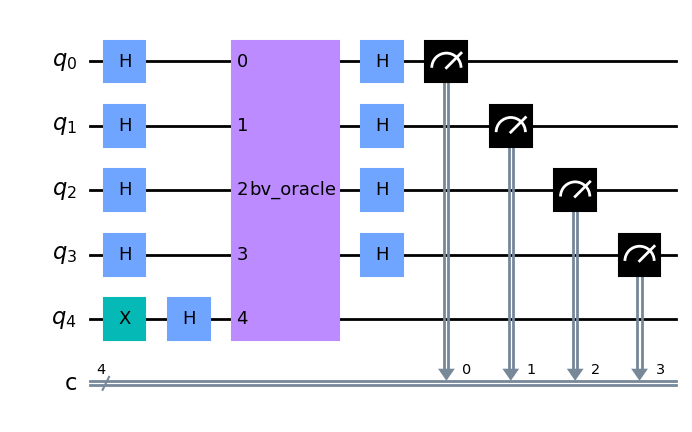

In [8]:
bv_c.draw("mpl")

In [9]:
backend = Aer.get_backend('qasm_simulator')

In [10]:
result = execute(bv_c, backend).result().get_counts()

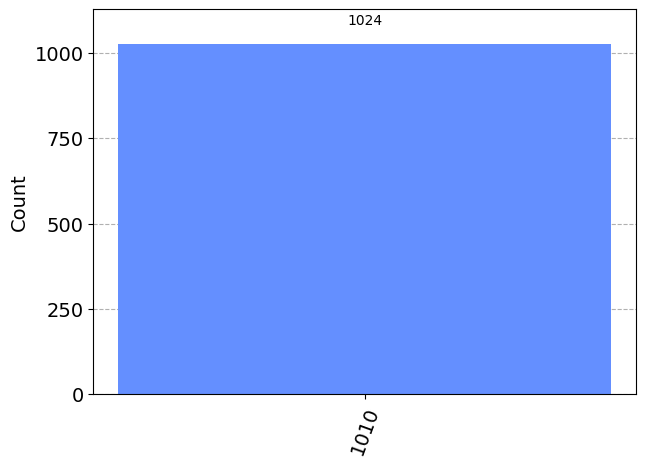

In [11]:
plot_histogram(result)

In [12]:
%run cred.sh

/content/cred.sh:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("7ec7c3d9c61b02577a80462aeed74b169ce4defa242d2b2fc5031cabfac5f8199274a09d822b1dcd65125930a20f7c7c5f147e4785837efcc84764640599e462")
configrc.store_credentials:WARNING:2023-07-12 20:08:55,921: Credentials already present. Set overwrite=True to overwrite.


<Figure size 640x480 with 0 Axes>

In [13]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider(hub = "ibm-q")
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [15]:
%qiskit_backend_overview

In [16]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [17]:
backend = provider.get_backend("ibmq_quito")
transpile_bv_c = transpile(bv_c, backend)
job = execute(transpile_bv_c, backend)

In [ ]:
result = job.result().get_counts()
plot_histogram(result)

In [ ]:
result = job.result().get_counts()
plot_histogram(result)